In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
import pandas as pd

mnist_train = pd.read_csv('mnist_train.csv',delimiter= ',')
mnist_test  = pd.read_csv('mnist_test.csv',delimiter= ',')

mnist_train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import sklearn

mnist_train = mnist_train.values
mnist_test = mnist_test.values

In [5]:
X_train = mnist_train[:,1:]
X_test = mnist_test[:,1:]
y_train = mnist_train[:,0]
y_test = mnist_test[:,0]

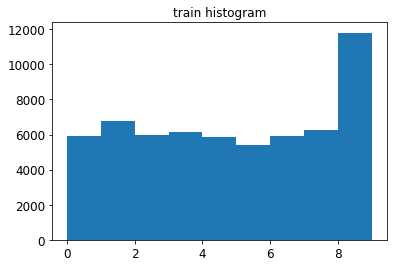

In [6]:
plt.hist(y_train, bins = [0,1,2,3,4,5,6,7,8,9]) 
plt.title("train histogram") 
plt.show()

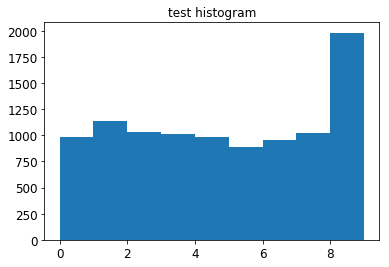

In [7]:
plt.hist(y_test, bins = [0,1,2,3,4,5,6,7,8,9]) 
plt.title("test histogram") 
plt.show()

In [8]:
shuffle_index = np.random.permutation(59999)

X_train , y_train = X_train[shuffle_index] , y_train[shuffle_index]

In [9]:
np.shape(X_train)

(59999, 784)

## Training a binary classifier for 8

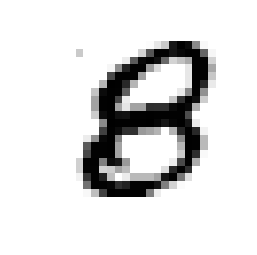

In [10]:
import matplotlib

some_digit = X_train[10000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation ='nearest')
plt.axis('off')
plt.show()

In [11]:
y_train_8 = (y_train == 8)
y_test_8 = (y_test ==8)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [13]:
#testing output

sgd_clf.predict([some_digit])

array([ True])

### Cross validation

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring='accuracy')

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

array([0.93830308, 0.92334617, 0.92959648])

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_8,y_train_pred)

array([[52928,  1220],
       [ 2955,  2896]])

### Precision and Recall

In [17]:
#precision is the ratio of true positives out of all positives = TP/(TP + FP)
#recall is the true positive rate = TP/(TP + FN)

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_8, y_train_pred)

0.7035957240038873

In [18]:
recall_score(y_train_8, y_train_pred)

0.4949581268159289

In [19]:
from sklearn.metrics import f1_score

f1_score(y_train_8, y_train_pred)

0.5811176883716264

In [20]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([86044.0747416])

In [21]:
threshold =0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv =3, method = 'decision_function')

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

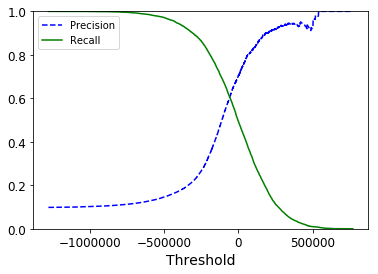

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_8,y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds, recalls[:-1],"g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# 0 is the threshold chosen by default

### ROC curve

Reciever operating characteristic plots true positive rate against false positive rate.

In [24]:
from sklearn.metrics import roc_curve

fpr , tpr , thresholds =  roc_curve(y_train_8, y_scores)

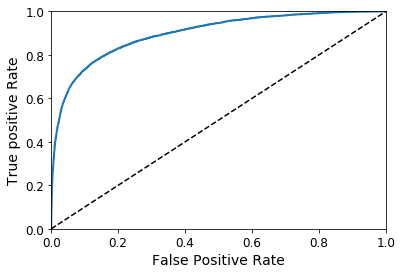

In [25]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label = label , linewidth = 2)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True positive Rate")
    
plot_roc_curve(fpr, tpr)
plt.show()

#higher the recall, higher the false positives
#true positive rate is basically recall

In [26]:
from sklearn.metrics import roc_auc_score

#perfect classifier will have area as 1
#while a completely random classifier has 0.5 auc

roc_auc_score(y_train_8, y_scores)

0.8975995192070418

In [27]:
#trying with random forest 

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_8, cv = 3, method = "predict_proba")
y_probas_forest

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


array([[1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [28]:
y_scores_forest = y_probas_forest[:, 1]  #score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_8, y_scores_forest)

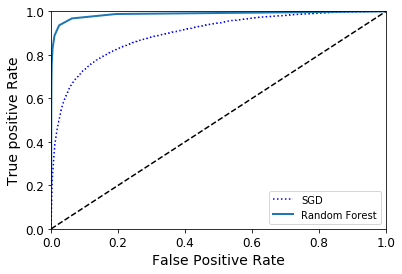

In [29]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [30]:
roc_auc_score(y_train_8, y_scores_forest)

0.9872106253865052

## Multiclass Classification

In [31]:
forest_clf = RandomForestClassifier(random_state=42)
y_forest = cross_val_predict(forest_clf, X_train, y_train, cv = 5, method = "predict")

In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_forest)
accuracy

0.9436657277621293

In [33]:
#scaling the inputs

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [34]:
y_forest_scaled = cross_val_predict(forest_clf, X_train_scaled, y_train, cv = 5, method = "predict")
accuracy = accuracy_score(y_train, y_forest_scaled)
accuracy

0.9435657260954349

In [64]:
forest_clf.fit(X_train_scaled,y_train)
forest_preds = forest_clf.predict(X_test_scaled)
forest_accuracy = accuracy_score(y_test, forest_preds)
forest_accuracy

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.8961896189618962

### One vs All model

In [35]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([8])

In [63]:
sgd_preds = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_preds)
sgd_accuracy

0.8400840084008401

In [36]:
y_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv = 5, method = "predict")
accuracy = accuracy_score(y_train, y_sgd)
accuracy

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

0.8536475607926799

In [37]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

#highest score will be the one for the correct class

array([[-133125.15734751, -694236.91316364, -437847.30578541,
        -547403.02548054, -312263.48795978, -174625.29623279,
        -373773.90645594, -980367.14429658,   86044.0747416 ,
        -685749.06772655]])

In [38]:
np.argmax(some_digit_scores)

8

In [39]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### One vs One

In [40]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

array([8])

In [41]:
y_ovo = ovo_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_ovo)
accuracy

0.9262154369239487

In [42]:
# Trying the same apporach but with scaled inputs
ovo_clf.fit(X_train_scaled, y_train)
y_ovo_scaled = ovo_clf.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_ovo_scaled)
accuracy

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

0.9373156219270321

In [43]:
#Testing set results

X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))



In [44]:
y_ovo_scaled_test = ovo_clf.predict(X_test_scaled)
ovo_accuracy = accuracy_score(y_test, y_ovo_scaled_test)
ovo_accuracy

0.9198919891989199

## Error Analysis

In [45]:
conf_mx = confusion_matrix(y_test, y_ovo_scaled_test)
conf_mx

array([[ 945,    0,    3,    2,    2,   18,    5,    2,    3,    0],
       [   0, 1107,    6,    2,    0,    3,    2,    1,   14,    0],
       [  10,    6,  934,   14,    8,    5,   15,    8,   29,    3],
       [   4,    0,   19,  900,    1,   38,    0,   14,   29,    5],
       [   1,    1,   10,    2,  924,    0,    5,    6,    6,   27],
       [   4,    2,    4,   48,    3,  790,    8,    1,   26,    6],
       [   5,    1,   11,    2,    8,   22,  906,    0,    3,    0],
       [   0,    3,   22,    9,    6,    4,    0,  937,    6,   40],
       [   4,    2,   11,   29,    6,   42,    6,    4,  862,    8],
       [   4,    6,    3,   10,   36,   10,    0,   30,   17,  893]])

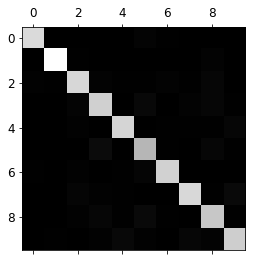

In [46]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

### Deep learning approach

In [47]:
#from sklearn.neighbors import KNeighborsClassifier

#knn_clf = KNeighborsClassifier()

#knn_clf.fit(X_train,y_train)
#y_train_knn = knn_clf.predict(X_train)
#accuracy = accuracy_score(y_train, y_train_knn)
#accuracy

In [48]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',sparse = False)

In [49]:
y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))

y_train_scaled =enc.fit_transform(y_train)
y_test_scaled =enc.fit_transform(y_test)

In [50]:
X_train_reshaped = np.reshape(X_train_scaled,(59999,28,28))

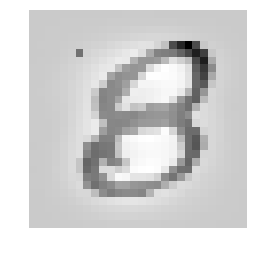

In [51]:
plt.imshow(X_train_reshaped[10000], cmap = matplotlib.cm.binary, interpolation ='nearest')
plt.axis('off')
plt.show()

In [52]:
np.shape(X_test_scaled)

(9999, 784)

In [53]:
X_test_reshaped = np.reshape(X_test_scaled,(9999,28,28))

In [54]:
y_train_scaled[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

### DNN

In [55]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

Using TensorFlow backend.


In [56]:
model = Sequential()

model.add(Dense(64,input_shape=(28,28,),activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_reshaped, y_train_scaled , epochs = 100, validation_data = (X_test_reshaped,y_test_scaled))

Train on 59999 samples, validate on 9999 samples
Epoch 1/100
59999/59999 [==============================] - 5s 82us/step - loss: 0.7486 - acc: 0.7655 - val_loss: 0.2938 - val_acc: 0.9147
Epoch 2/100
59999/59999 [==============================] - 5s 80us/step - loss: 0.3553 - acc: 0.8943 - val_loss: 0.2236 - val_acc: 0.9345
Epoch 3/100
59999/59999 [==============================] - 5s 78us/step - loss: 0.2924 - acc: 0.9126 - val_loss: 0.1935 - val_acc: 0.9439
Epoch 4/100
59999/59999 [==============================] - 5s 78us/step - loss: 0.2645 - acc: 0.9210 - val_loss: 0.1774 - val_acc: 0.9462
Epoch 5/100
59999/59999 [==============================] - 5s 87us/step - loss: 0.2447 - acc: 0.9267 - val_loss: 0.1674 - val_acc: 0.9496
Epoch 6/100
59999/59999 [==============================] - 5s 82us/step - loss: 0.2310 - acc: 0.9298 - val_loss: 0.1634 - val_acc: 0.9507
Epoch 7/100
59999/59999 [==============================] - 5s 81us/step - loss: 0.2227 - acc: 0.9328 - val_loss: 0.1541 - v

59999/59999 [==============================] - 5s 79us/step - loss: 0.1440 - acc: 0.9556 - val_loss: 0.1116 - val_acc: 0.9677
Epoch 60/100
59999/59999 [==============================] - 5s 79us/step - loss: 0.1419 - acc: 0.9556 - val_loss: 0.1113 - val_acc: 0.9680
Epoch 61/100
59999/59999 [==============================] - 5s 79us/step - loss: 0.1396 - acc: 0.9567 - val_loss: 0.1112 - val_acc: 0.9670
Epoch 62/100
59999/59999 [==============================] - 5s 79us/step - loss: 0.1434 - acc: 0.9574 - val_loss: 0.1119 - val_acc: 0.9678
Epoch 63/100
59999/59999 [==============================] - 5s 79us/step - loss: 0.1411 - acc: 0.9571 - val_loss: 0.1119 - val_acc: 0.9679
Epoch 64/100
59999/59999 [==============================] - 5s 79us/step - loss: 0.1404 - acc: 0.9569 - val_loss: 0.1118 - val_acc: 0.9682
Epoch 65/100
59999/59999 [==============================] - 5s 79us/step - loss: 0.1400 - acc: 0.9573 - val_loss: 0.1121 - val_acc: 0.9679
Epoch 66/100
59999/59999 [==============

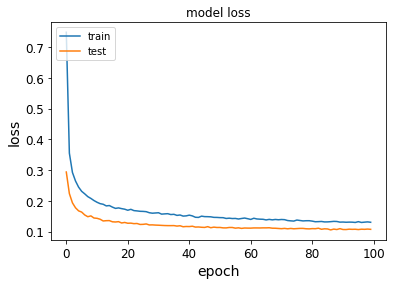

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

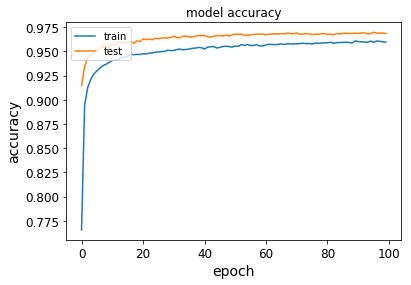

In [58]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
dnn_acc = history.history['val_acc'][99]
dnn_acc

0.9684968496849685

### CNN

In [60]:
X_train_reshaped = np.reshape(X_train_reshaped,(59999,28,28,1))
X_test_reshaped = np.reshape(X_test_reshaped,(9999,28,28,1))

In [61]:
model = Sequential()
lr = 0.01
    
    
model.add(Conv2D(16, (3,3),input_shape=(28,28,1), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(16, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(32, (2,2), padding= 'same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (2,2), padding= 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2,2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (2,2), padding='same'))
model.add(Activation('relu'))
#model.add(Conv2D(64, (2,2), padding='same'))
#model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
 
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(256))
    
    
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.4))
   
model.add(Dense(10))
model.add(Activation('softmax'))
 
    
model.compile(optimizer=SGD(lr=lr),loss='categorical_crossentropy',metrics=['accuracy'])
history2 = model.fit(X_train_reshaped, y_train_scaled, epochs = 8, validation_data = (X_test_reshaped,y_test_scaled))

Train on 59999 samples, validate on 9999 samples
Epoch 1/8
59999/59999 [==============================] - 119s 2ms/step - loss: 0.4075 - acc: 0.8753 - val_loss: 0.0857 - val_acc: 0.9725
Epoch 2/8
59999/59999 [==============================] - 118s 2ms/step - loss: 0.1566 - acc: 0.9540 - val_loss: 0.0665 - val_acc: 0.9796
Epoch 3/8
59999/59999 [==============================] - 118s 2ms/step - loss: 0.1123 - acc: 0.9671 - val_loss: 0.0495 - val_acc: 0.9839
Epoch 4/8
59999/59999 [==============================] - 118s 2ms/step - loss: 0.0922 - acc: 0.9727 - val_loss: 0.0376 - val_acc: 0.9880
Epoch 5/8
59999/59999 [==============================] - 118s 2ms/step - loss: 0.0798 - acc: 0.9770 - val_loss: 0.0404 - val_acc: 0.9874
Epoch 6/8
59999/59999 [==============================] - 118s 2ms/step - loss: 0.0695 - acc: 0.9792 - val_loss: 0.0309 - val_acc: 0.9899
Epoch 7/8
59999/59999 [==============================] - 119s 2ms/step - loss: 0.0625 - acc: 0.9813 - val_loss: 0.0309 - val_acc:

In [68]:
cnn_acc = history2.history['val_acc'][7]
cnn_acc

0.9915991599159916

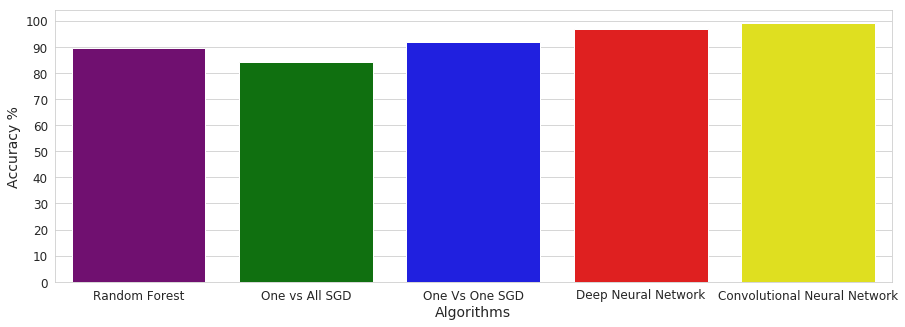

In [69]:
import seaborn as sns

methods = ["Random Forest","One vs All SGD","One Vs One SGD","Deep Neural Network","Convolutional Neural Network"]
accuracy = [forest_accuracy*100,sgd_accuracy*100,ovo_accuracy*100,dnn_acc*100,cnn_acc*100]
colors = ["purple", "green", "blue", "red","yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.yticks(np.arange(0,110,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()